# Social Network Analysis - Class 7 - Statistical Significance, ERGMs

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
import igraph as ig

In [2]:
# imput the dataframe we created last class, which includes the Lazega attributes as well as the graph-related information for each node
lazega_attr = pd.read_csv('Data/lazega_graph_data.csv')

In [3]:
lazega_attr.head()

,ID,status,gender,office,seniority,age,practice,lawschool,d_in,d_out,degree,btwn,close,eigen
0,1,1,1,1,31,64,1,1,12,3,15,11.809535,0.007519,0.339216
1,2,1,1,1,32,62,2,1,19,7,26,53.277764,0.008333,0.537202
2,3,1,1,2,13,67,1,1,7,7,14,8.600505,0.006944,0.276623
3,4,1,1,1,31,59,2,3,17,17,34,55.105151,0.008772,0.729378
4,5,1,1,2,31,59,1,2,6,4,10,9.009522,0.007143,0.131911


In [21]:
# slide 22 - predicting (advice) in-degree
smf.ols('d_in ~ status + gender + seniority + C(lawschool)', data=lazega_attr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d_in   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           7.47e-08
Time:                        22:33:52   Log-Likelihood:                -216.66
No. Observations:                  71   AIC:                             445.3
Df Residuals:                      65   BIC:                             458.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            19.0864      4.568      4.178      0.000       9.963      28.210
C(lawschool)[T.2]    -0.9304      1.840     -0.506      0.615      -4.605       2.744
C(lawschool)[T.3]    -3.6806      1.850     -1.990      0.051      -7.374       0.013
status               -7.6622      1.979     -3.872      0.000     -11.614      -3.710
gender                1.5167      1.642      0.924      0.359      -1.762       4.795
seniority             0.0842      0.107      0.787      0.434      -0.130       0.298
==============================================================================
Omnibus:                       11.941   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.653
Skew:                           0.786   Prob(JB):                      0.00108
Kurtosis:                       4.464   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# slide 25 - predicting (advice) in-degree
smf.ols('d_in ~ status + C(lawschool)', data=lazega_attr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d_in   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     18.59
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           6.99e-09
Time:                        22:34:47   Log-Likelihood:                -217.34
No. Observations:                  71   AIC:                             442.7
Df Residuals:                      67   BIC:                             451.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.1184      2.104     10.990      0.000      18.920      27.317
C(lawschool)[T.2]    -1.2277      1.786     -0.688      0.494      -4.792       2.336
C(lawschool)[T.3]    -4.2466      1.759     -2.414      0.019      -7.758      -0.735
status               -8.2654      1.328     -6.225      0.000     -10.916      -5.615
==============================================================================
Omnibus:                       12.108   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.364
Skew:                           0.828   Prob(JB):                      0.00125
Kurtosis:                       4.333   Cond. No.                         7.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# slide 30 - negative binomial model
# Bootstrapping is not yet available in statsmodels

smf.glm('d_in ~ status + gender + seniority + C(lawschool)', data=lazega_attr, family=sm.families.NegativeBinomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   d_in   No. Observations:                   71
Model:                            GLM   Df Residuals:                       65
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -215.92
Date:                Fri, 18 Jan 2019   Deviance:                       50.595
Time:                        22:37:09   Pearson chi2:                     33.5
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3103      0.902      3.670      0.000       1.543       5.078
C(lawschool)[T.2]    -0.0152      0.362     -0.042      0.967      -0.724       0.694
C(lawschool)[T.3]    -0.5019      0.366     -1.370      0.171      -1.220       0.216
status               -1.0593      0.396     -2.678      0.007      -1.835      -0.284
gender                0.2394      0.336      0.712      0.477      -0.420       0.899
seniority             0.0129      0.021      0.616      0.538      -0.028       0.054
=====================================================================================
"""

In [24]:
# slide 36

smf.ols('d_in ~ status + d_out + gender + practice', data=lazega_attr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   d_in   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     11.71
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           3.03e-07
Time:                        22:39:58   Log-Likelihood:                -219.80
No. Observations:                  71   AIC:                             449.6
Df Residuals:                      66   BIC:                             460.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0593      3.113      6.444      0.000      13.844      26.275
status        -9.4699      1.437     -6.589      0.000     -12.339      -6.600
d_out          0.1041      0.105      0.988      0.327      -0.106       0.314
gender         2.0155      1.651      1.221      0.226      -1.280       5.311
practice      -0.5097      1.381     -0.369      0.713      -3.266       2.247
==============================================================================
Omnibus:                        9.175   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.759
Skew:                           0.783   Prob(JB):                       0.0125
Kurtosis:                       3.711   Cond. No.                         55.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## QAP regression

In [2]:
# slide 38

# load data
krack = pd.read_csv('Data/krack_full_df.csv')

In [55]:
smf.ols('advice_tie ~ friendship_tie', data=krack).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             advice_tie   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.76
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           0.000234
Time:                        14:45:01   Log-Likelihood:                -309.01
No. Observations:                 441   AIC:                             622.0
Df Residuals:                     439   BIC:                             630.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3835      0.027     14.447      0.000       0.331       0.436
friendship_tie     0.2048      0.055      3.710      0.000       0.096       0.313
==============================================================================
Omnibus:                        5.744   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.057   Jarque-Bera (JB):               64.932
Skew:                           0.280   Prob(JB):                     7.95e-15
Kurtosis:                       1.206   Cond. No.                         2.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# normal regression results are fairly close to R's QAP regression results 

smf.ols('friendship_tie ~ advice_tie + reports_to_tie', data=krack).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         friendship_tie   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     12.59
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           4.81e-06
Time:                        14:45:02   Log-Likelihood:                -232.59
No. Observations:                 441   AIC:                             471.2
Df Residuals:                     438   BIC:                             483.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1660      0.026      6.393      0.000       0.115       0.217
advice_tie         0.1175      0.041      2.892      0.004       0.038       0.197
reports_to_tie     0.3223      0.097      3.333      0.001       0.132       0.512
==============================================================================
Omnibus:                       73.458   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.013
Skew:                           1.220   Prob(JB):                     1.29e-24
Kurtosis:                       2.816   Cond. No.                         5.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from rpy2.robjects.packages import importr

sna = importr('sna')

%load_ext rpy2.ipython

In [4]:
%%R -i krack

dam = as.matrix(krack$advice_tie)
dfm = as.matrix(krack$friendship_tie)

n1 = netlm(dam, dfm)
summary(n1)


OLS Network Model

Residuals:
          0%          25%          50%          75%         100% 
-0.588235294 -0.001335264 -0.001335264 -0.001335264  0.998664736 

Coefficients:
            Estimate    Pr(<=b) Pr(>=b) Pr(>=|b|)
(intercept) 0.001335264 0.096   0.904   0.904    
x1          0.586900030 1.000   0.000   0.000    

Residual standard error: 0.03982 on 194920 degrees of freedom
Multiple R-squared: 0.1851 	Adjusted R-squared: 0.1851 
F-statistic: 4.427e+04 on 1 and 194920 degrees of freedom, p-value:     0 


Test Diagnostics:

	Null Hypothesis: qap 
	Replications: 1000 
	Coefficient Distribution Summary:

       (intercept)       x1
Min        10.6534  -0.6316
1stQ       14.8048  -0.6316
Median     14.8048  -0.6316
Mean       14.7875   0.6178
3rdQ       14.8048  -0.6316
Max        14.8717 177.3001



## ERGM - Using Grey's Anatomy network data

In [3]:
# slide 57 - import data and set up graph

ga_mat = pd.read_csv('Data/Grey\'s Anatomy - sociomat.tsv', sep='\t')
ga_mat = ga_mat.set_index("Unnamed: 0", drop=True)

names = list(ga_mat.columns)
ga_mat.index = list(np.arange(1, 45))
ga_mat.columns = list(np.arange(1, 45))

# set up undirected graph
ga_net = ig.Graph.Adjacency((ga_mat.values>0).tolist())
ga_net.to_undirected()
ga_net.vs['name'] = names

In [4]:
ga_atts = pd.read_csv('Data/Grey\'s Anatomy - attributes.tsv', sep='\t')

# add vertex attributes
for c in ga_atts.columns:
    ga_net.vs[c] = ga_atts.loc[ga_atts.name==ga_net.vs['name'], c]

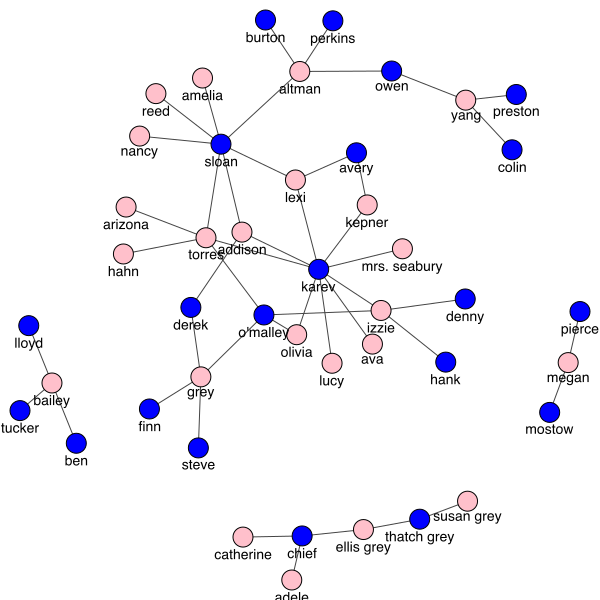

In [6]:
# slide 58 - plotting the network

gender_color = {"F": "pink", "M": "blue"}

ig.plot(ga_net, 
        vertex_color = [gender_color[gender] for gender in ga_net.vs['sex']], 
        vertex_label = ga_net.vs['name'], 
       vertex_label_dist = 1.2)

The ERGM model can be estimated in Python using the PyMC3 module following this blog post: http://socialabstractions-blog.tumblr.com/post/53391947460/exponential-random-graph-models-in-python. However, some package import issues related to PyMC3 and Theanos were encountered when trying to implement this example in Python on macOS Mojave, as described by the posts below:

https://github.com/Theano/Theano/issues/6645
https://discourse.pymc.io/t/problems-with-pymc3-after-updating-to-macos-mojave/1994/5
https://stackoverflow.com/questions/52509602/cant-compile-c-program-on-a-mac-after-upgrade-to-mojave

For now, the R version will be shown.

In [14]:
ergm = importr('ergm')

In [18]:
%%R -i ga_mat,ga_atts

ga_mat = as.matrix(ga_mat)

ga_net = network(ga_mat, vertex.attr=ga_atts, vertex.attrnames=colnames(ga_atts),
                directed=F, hyper=F, loops=F, multiple=F, bipartite=F)

ga.base = ergm(ga_net ~ edges + nodematch("sex"))
summary(ga.base)


Summary of model fit

Formula:   ga_net ~ edges + nodematch("sex")

Iterations:  6 out of 20 

Monte Carlo MLE Results:
              Estimate Std. Error MCMC % z value Pr(>|z|)    
edges          -2.3003     0.1581      0 -14.547   <1e-04 ***
nodematch.sex  -3.1399     0.7260      0  -4.325   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Null Deviance: 1311.4  on 946  degrees of freedom
 Residual Deviance:  320.5  on 944  degrees of freedom
 
AIC: 324.5    BIC: 334.2    (Smaller is better.) 
